# Visualise

In [1]:
import re
import networkx as nx
from community import community_louvain
from collections import defaultdict
import pandas as pd
import random
import numpy as np

In [2]:
start_month='2020-07'
end_month='2021-05'

In [3]:
classifier='NB'
#classifier='CNN'
softmax=True



LOO=False



# MCC hard and soft classification

In [4]:
if classifier=='CNN':
    
    
    #threshold,sample_size,accuracy = 1000,1000,0.6088
    

    #threshold,sample_size,accuracy = 3000,3000,0.3053
    #threshold,sample_size,accuracy = 3000,3000,0.4979
    #threshold,sample_size,accuracy = 3000,3000,0.6025
    #threshold,sample_size,accuracy = 3000,3000,0.7412
    #threshold,sample_size,accuracy = 10000,10000,0.8546

    if LOO==True:
        region_leave_out='England'
        threshold,sample_size,accuracy = 3000,3000,0.7278        
        model_name=f'CNNv5_{threshold}_{sample_size}_LOO_{region_leave_out}'
    else:
        model_name=f'CNNv5_{threshold}_{sample_size}'

    if softmax==False:
        cross_tab_path=f'crosstable/MCC_{model_name}_accuracy{accuracy:.4f}_{start_month}---{end_month}.pkl'
        misclassification_crosstab=pd.read_pickle(cross_tab_path)

        # hard classification
        # accuracy on the test set
        # epoch 4, accuracy 0.3053
        # epoch 7, accuracy 0.4058
        # epoch 12, accuracy 0.4979
        # epoch 26, accuracy 0.6025
        # epoch 68, accuracy 0.7154
        # epoch 95, accuracy 0.7412

        # 10k 10k
        # epoch 62, accuracy 0.8546

    if softmax==True:

        # soft classification
        cross_tab_path=f'crosstable/MCC_softmax_{model_name}_accuracy{accuracy:.4f}_{start_month}---{end_month}.pkl'
        misclassification_crosstab=pd.read_pickle(cross_tab_path)


# MCC NB 

In [5]:
import pickle

if classifier=='NB':

    softmax=False


    threshold,sample_size,kmer=300,300,25

    model_name=f'NB_{threshold}_{sample_size}_k{kmer}'

    misclassification_crosstab=pd.read_pickle(f'crosstable/MCC_{model_name}_{start_month}---{end_month}.pkl')


    with open(f'cross_validation_accuracy/MCC_{model_name}_{start_month}---{end_month}.pkl', "rb") as fp:   
        CV_scores=pickle.load(fp)


    accuracy=np.mean(CV_scores)
    print('mean of cross validation results',np.mean(CV_scores))
    print('standard deviation',np.std(CV_scores))

mean of cross validation results 0.580204081632653
standard deviation 0.006891932050021171


In [6]:
misclassification_crosstab

Predicted           Australia  Austria  Bangladesh  Belgium  Brazil  Canada  \
Actual                                                                        
Australia                 267        0           0        0       0       1   
Austria                     0      138           1        2       0       2   
Bangladesh                  1        0          59        0       0       0   
Belgium                     0        6           0       91       0       2   
Brazil                      0        0           0        0     163       0   
Canada                      0        0           2        0       2     239   
Chile                       0        0           0        0       0       0   
CzechRepublic               0        0           0        0       0       1   
DRC                         0        0           0        0       0       8   
Denmark                     0        2           3        1       0       1   
Egypt                       0        0           0        0       0       0   
England                     0        2           1        0       0       3   
Finland                     0        0           0        1       0       0   
France                      0        0           0        3       1       0   
Gambia                      0        0           0        2       0       1   
Germany                     0        4           0        1       0       0   
HongKong                    0        1           1        0       0       3   
Iceland                     0        3           0        6       0       1   
India                       0        0           3        0       0       5   
Indonesia                   0        0           4        0       0       1   
Ireland                     0        0           0        0       2       2   
Israel                      0        0           0        0       1       1   
Italy                       0        0           0        0       1       0   
Japan                       0        0           0        0       0       0   
Jordan                      0        0           0        0       0       0   
Kenya                       0        0           1        0       0       0   
Lithuania                   0        2           0        0       0       0   
Luxembourg                  0        0           0       16       0       0   
Mayotte                     0        0           0        2       0       0   
Mexico                      0        0           0        0       0       4   
Netherlands                 0        0           0        5       3       1   
NewZealand                  0        0           0        3       0      10   
NorthernIreland             0        2           1        0       0       0   
Norway                      0        0           0        1       1       2   
Poland                      0        2           1        0       0       3   
Portugal                    0        1           0        2       7       2   
Russia                      0        0           0        1       0       3   
SaudiArabia                 0        0           2        0       0       0   
Scotland                    0        0           0        0       0       2   
Singapore                   0        0           1        0       1       2   
SouthAfrica                 0        0           0        0       1       0   
SouthKorea                  0        0           0        2       0       1   
Spain                       0        4           0        0       0       1   
Sweden                      0        1           0        0       1       0   
Switzerland                 0        7           0        2       1       0   
Turkey                      0        0           0        0       0       1   
USA                         0        0           2        0       1      30   
UnitedArabEmirates          0        0           0        0       0       0   
Wales                       0        0           0

In [7]:
def region_format_for_here(list_of_places):
    new_list=[]
    for i in list_of_places:
        if i=='USA':
            new_list.append('United States')
        elif i=='CzechRepublic':
            new_list.append('Czechia')
        elif i=='DRC':
            new_list.append('Democratic Republic of the Congo')
        elif i=='Korea, Republic of':
            new_list.append('South Korea')
        elif i=='Russian Federation':
            new_list.append('Russia')
        elif i=='Czech Republic':
            new_list.append('Czechia')            
        elif i=='Gambia':
            new_list.append('The Gambia')
        elif i=='Macedonia, the former Yugoslav Republic of':
            new_list.append('North Macedonia')
        elif i=='Taiwan, Province of China':
            new_list.append('Taiwan')    
        elif i=='Venezuela, Bolivarian Republic of':
            new_list.append('Venezuela')               
        elif i=='Iran, Islamic Republic of':
            new_list.append('Iran')    
        elif i=='Viet Nam':
            new_list.append('Vietnam')    
        elif i.upper()==i:
            new_list.append(i)
        else:
            new_list.append(' '.join(re.findall('[A-Z][^A-Z]*',i)))
    
    new_new_list=[]#remove double splitting
    for i in new_list:
        new_new_list.append(' '.join(i.split()))
    
    return new_new_list

region_geo = {
    'Argentina': (-63.6167, -38.4161),
    'Brazil': (-51.9253, -14.2350),
    'Chile': (-71.5420, -35.6751),
    'Ghana': (-1.0232, 7.9465),
    'Israel': (34.8516, 31.0461),
    'Nigeria': (8.6753, 9.0820),
    'United States': (-95.7129, 37.0902),
    'Uganda': (32.2903, 1.3733),
    #'All': (0.0000, 0.0000), # Placeholder for 'All'
    'Aruba': (-69.9683, 12.5211),
    'Hungary': (19.5033, 47.1625),
    'Australia': (133.7751, -25.2744),
    'Austria': (14.5501, 47.5162),
    'Belgium': (4.4699, 50.5039),
    'Denmark': (9.5018, 56.2639),
    'Iceland': (-19.0208, 64.9631),
    'Ireland': (-8.2439, 53.4129),
    'Northern Ireland': (-6.4923, 54.7877),
    'Spain': (-3.7492, 40.4637),
    'Bahrain': (50.5577, 26.0667),
    'Bangladesh': (90.3563, 23.6849),
    'Egypt': (30.8025, 26.8206),
    'France': (2.2137, 46.2276),
    'Germany': (10.4515, 51.1657),
    'Hong Kong': (114.1095, 22.3964),
    'India': (78.9629, 20.5937),
    'Indonesia': (113.9213, -0.7893),
    'Mozambique': (35.5296, -18.6657),
    'Netherlands': (5.2913, 52.1326),
    'North Macedonia': (21.7453, 41.6086),
    'Norway': (8.4689, 60.4720),
    'Senegal': (-14.4524, 14.4974),
    'Singapore': (103.8198, 1.3521),
    'Slovenia': (14.9955, 46.1512),
    'South Africa': (22.9375, -30.5595),
    'South Korea': (127.7669, 35.9078),
    'Sri Lanka': (80.7718, 7.8731),
'Switzerland': (8.2275, 46.8182),
'United Arab Emirates': (53.8478, 23.4241),
'New Zealand': (174.8859, -40.9006),
'Romania': (24.9668, 45.9432),
'Russia': (105.3188, 61.5240),
'Thailand': (100.9925, 15.8700),
'Turkey': (35.2433, 38.9637),
'Luxembourg': (6.1296, 49.8153),
'Mayotte': (45.1662, -12.8275),
'Portugal': (-8.2245, 39.3999),
'Canada': (-106.3468, 56.1304),
'Colombia': (-74.2973, 4.5709),
'French Guiana': (-53.1258, 3.9339),
'Italy': (12.5674, 41.8719),
'Peru': (-75.0152, -9.1900),
'Sweden': (18.6435, 60.1282),
'Costa Rica': (-83.7534, 9.7489),
'Czechia': (15.4729, 49.8175),
'England': (-1.1743, 52.3555),
'Rwanda': (29.8739, -1.9403),
'Equatorial Guinea': (10.2679, 1.6508),
'Lithuania': (23.8813, 55.1694),
'Democratic Republic of the Congo': (21.7587, -4.0383),
'Gambia': (-15.3101, 13.4432),
'Mexico': (-102.5528, 23.6345),
'Poland': (19.1451, 51.9194),
'Zambia': (27.8493, -13.1339),
'Ecuador': (-78.1834, -1.8312),
'Finland': (25.7482, 61.9241),
'Scotland': (-4.2026, 56.4907),
'Slovakia': (19.6990, 48.6690),
'Wales': (-3.7837, 52.1307),
'Kenya': (37.9062, -0.0236),
'Gibraltar': (-5.3536, 36.1408),
'Latvia': (24.6032, 56.8796),
'Japan': (138.2529, 36.2048),
'Saudi Arabia': (45.0792, 23.8859),
'Jordan': (36.2384, 30.5852),
'Malaysia': (101.9758, 4.2105)
}


In [8]:
# Extending the region_geo dictionary with additional countries
region_geo.update({
    'Luxembourg': (6.1296, 49.8153),
    'Mayotte': (45.1662, -12.8275),
    'Portugal': (-8.2245, 39.3999),
    'Canada': (-106.3468, 56.1304),
    'Colombia': (-74.2973, 4.5709),
    'French Guiana': (-53.1258, 3.9339),
    'Italy': (12.5674, 41.8719),
    'Peru': (-75.0152, -9.1900),
    'Sweden': (18.6435, 60.1282),
    'Costa Rica': (-83.7534, 9.7489),
    'Czechia': (15.4729, 49.8175),
    'England': (-1.1743, 52.3555),
    'Rwanda': (29.8739, -1.9403),
    'Equatorial Guinea': (10.2679, 1.6508),
    'Lithuania': (23.8813, 55.1694),
    'Democratic Republic of the Congo': (21.7587, -4.0383),
    'The Gambia': (-15.3101, 13.4432),
    'Mexico': (-102.5528, 23.6345),
    'Poland': (19.1451, 51.9194),
    'Zambia': (27.8493, -13.1339),
    'Ecuador': (-78.1834, -1.8312),
    'Finland': (25.7482, 61.9241),
    'Scotland': (-4.2026, 56.4907),
    'Slovakia': (19.6990, 48.6690),
    'Wales': (-3.7837, 52.1307),
    'Kenya': (37.9062, -0.0236),
    'Gibraltar': (-5.3536, 36.1408),
    'Latvia': (24.6032, 56.8796),
    'Japan': (138.2529, 36.2048),
    'Saudi Arabia': (45.0792, 23.8859),
    'Jordan': (36.2384, 30.5852),
    'Malaysia': (101.9758, 4.2105)
})


In [9]:
region_list=list(misclassification_crosstab.index)
region_list.remove('All')
nodes_list=list(region_list)
nodes_list=region_format_for_here(nodes_list) 


In [10]:
len(set(region_list))==len(region_list) # check no repetition

True

In [11]:
A_NN=misclassification_crosstab

symmetrise=True



G_NN = nx.Graph()
for pred in region_list:
    for actual in region_list:
        try:
            if A_NN[pred][actual]>0:
                # must input a list to the region_format function, other wise the string got torn apart
                pred_formatted=region_format_for_here([pred])[0]
                actual_formatted=region_format_for_here([actual])[0] 
                if symmetrise==True:
                    
                    G_NN.add_edge(pred_formatted,actual_formatted,weight= A_NN[pred][actual]+A_NN[actual][pred])
                else:
                    G_NN.add_edge(pred_formatted,actual_formatted,weight= A_NN[pred][actual])
                    
        except:
            pass




In [12]:



new_nodes=dict(zip(list(G_NN.nodes()),region_format_for_here(list(G_NN.nodes()))))

G_NN = nx.relabel_nodes(G_NN, new_nodes)


In [13]:
resolution =1

partition = community_louvain.best_partition(G_NN, weight='weight', resolution=resolution)
partition

{'Australia': 0,
 'Bangladesh': 13,
 'Austria': 2,
 'Belgium': 16,
 'Denmark': 16,
 'England': 5,
 'Germany': 6,
 'Hong Kong': 7,
 'Iceland': 8,
 'Lithuania': 9,
 'Northern Ireland': 5,
 'Poland': 6,
 'Portugal': 5,
 'Spain': 5,
 'Sweden': 14,
 'Switzerland': 23,
 'Canada': 22,
 'India': 12,
 'Indonesia': 21,
 'Kenya': 19,
 'Saudi Arabia': 20,
 'Singapore': 21,
 'United States': 22,
 'Finland': 23,
 'France': 16,
 'The Gambia': 18,
 'Luxembourg': 16,
 'Mayotte': 17,
 'Netherlands': 16,
 'New Zealand': 11,
 'Norway': 18,
 'Russia': 18,
 'South Korea': 1,
 'Brazil': 11,
 'Ireland': 5,
 'Israel': 3,
 'Italy': 4,
 'South Africa': 13,
 'Czechia': 6,
 'Democratic Republic of the Congo': 10,
 'Mexico': 22,
 'Scotland': 5,
 'Turkey': 4,
 'Chile': 11,
 'Egypt': 13,
 'Japan': 12,
 'Wales': 5,
 'United Arab Emirates': 13,
 'Jordan': 15}

In [14]:

#formatted_regions=region_format(list(partition.keys()))
formatted_regions=region_format_for_here(list(partition.keys()))

community_dict_formatted=dict(zip(formatted_regions,list(partition.values())))

community_grouped = defaultdict(list)
for key, val in sorted(community_dict_formatted.items()):
    community_grouped[val].append(key)

n_communities=len(set(community_dict_formatted.values()))
communities_sorted_bysize=dict(enumerate(sorted(list(community_grouped.values()), key=len,reverse=True)))


# Only colour communities with size >1

In [15]:
community_size_min=1
communities_filtered_by_size=[k for (k,v) in list(communities_sorted_bysize.items()) if len(v)>community_size_min]

regions_community_filtered_by_size=[v for (k,v) in list(communities_sorted_bysize.items()) if len(v)>community_size_min]
regions_community_filtered_by_size=sum(regions_community_filtered_by_size,[])


community_dict_formatted_filtered_by_size={region_i:community_id for (community_id,members_c) in list(communities_sorted_bysize.items()) for region_i in members_c if len(members_c)>community_size_min}
regions_filtered_out=list(set(formatted_regions)-set(regions_community_filtered_by_size))
regions_filtered_out

['Israel',
 'Austria',
 'Australia',
 'Mayotte',
 'Jordan',
 'Lithuania',
 'Hong Kong',
 'Saudi Arabia',
 'Democratic Republic of the Congo',
 'Kenya',
 'South Korea',
 'Iceland',
 'Sweden']

In [16]:
community_dict_formatted_filtered_by_size

{'England': 0,
 'Ireland': 0,
 'Northern Ireland': 0,
 'Portugal': 0,
 'Scotland': 0,
 'Spain': 0,
 'Wales': 0,
 'Belgium': 1,
 'Denmark': 1,
 'France': 1,
 'Luxembourg': 1,
 'Netherlands': 1,
 'Bangladesh': 2,
 'Egypt': 2,
 'South Africa': 2,
 'United Arab Emirates': 2,
 'Brazil': 3,
 'Chile': 3,
 'New Zealand': 3,
 'Canada': 4,
 'Mexico': 4,
 'United States': 4,
 'Czechia': 5,
 'Germany': 5,
 'Poland': 5,
 'Norway': 6,
 'Russia': 6,
 'The Gambia': 6,
 'Finland': 7,
 'Switzerland': 7,
 'India': 8,
 'Japan': 8,
 'Indonesia': 9,
 'Singapore': 9,
 'Italy': 10,
 'Turkey': 10}

In [17]:
print('number of communities:',len(set(community_dict_formatted_filtered_by_size.values())))
print('number of countries with size >min:',len(community_dict_formatted_filtered_by_size))

number of communities: 11
number of countries with size >min: 36


In [18]:

# Count members in each community
community_sizes = defaultdict(int)
for node, community in partition.items():
    community_sizes[community] += 1

# Assign a unique number for each community
unique_communities = set(partition.values())
community_color_map = {comm: idx for idx, comm in enumerate(unique_communities)}

# Use a different number for small communities
small_community_color = max(community_color_map.values()) + 1



# Assign colors to nodes
node_colors = []
for node in partition:
    community = partition[node]
    if community_sizes[community] < 2:
        node_colors.append(small_community_color)  # Number for small communities
    else:
        node_colors.append(community_color_map[community])


In [19]:
import matplotlib.cm as cm

# Define the colormap you want (e.g., 'tab20')
colormap_name = 'hsv'
cmap = cm.get_cmap(colormap_name)

# Calculate the number of unique communities
n_partitionn = len(set(community_dict_formatted_filtered_by_size.values()))

# Calculate colors based on the chosen colormap
num_colors = n_partitionn
color_list = [cmap(community / num_colors) for community in list(community_dict_formatted_filtered_by_size.values())]

# Create a scheme mapping regions to colors
scheme = dict(zip(list(community_dict_formatted_filtered_by_size.keys()), color_list))

# Print the number of colors
print(num_colors)


11


In [20]:
color_list = [cmap(community / num_colors) for community in list(community_dict_formatted_filtered_by_size.values())]


In [21]:
len(set(community_dict_formatted_filtered_by_size.values()))

11

In [22]:
if classifier=='CNN':

    # MCC CNN

    if softmax==True:
        path=f'figures/MCC_CNN/soft_{start_month}to{end_month}_{model_name}.png'
        fig_title=f'MCC CNN Soft Misclassification Network, threshold={threshold}, sample_size={sample_size}'

    if softmax==False:
        path=f'figures/MCC_CNN/{start_month}to{end_month}_{model_name}_accuracy{accuracy}.png'

        fig_title=f'MCC CNN Misclassification Network, threshold={threshold}, sample_size={sample_size}'


# MCC NB
if classifier=='NB':
    path=f'figures/MCC_NB/{model_name}_accuracy{accuracy:.4f}_{start_month}---{end_month}.pdf'
    fig_title=f'MCC NB Misclassification Network, threshold={threshold}, sample_size={sample_size}'

print(path)
print(fig_title)


figures/MCC_NB/NB_300_300_k25_accuracy0.5802_2020-07---2021-05.pdf
MCC NB Misclassification Network, threshold=300, sample_size=300


/tmp/ipykernel_30120/993868467.py:55: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  patches = [Polygon(np.array(shape), True)]
/tmp/ipykernel_30120/993868467.py:100: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  patches = [Polygon(np.array(shape), True)]
/tmp/ipykernel_30120/993868467.py:169: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  patches = [Polygon(np.array(shape), True)]
/tmp/ipykernel_30120/993868467.py:186: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become k

uncolored ['The Gambia', 'Singapore', 'Scotland', 'Northern Ireland', 'England', 'Wales']


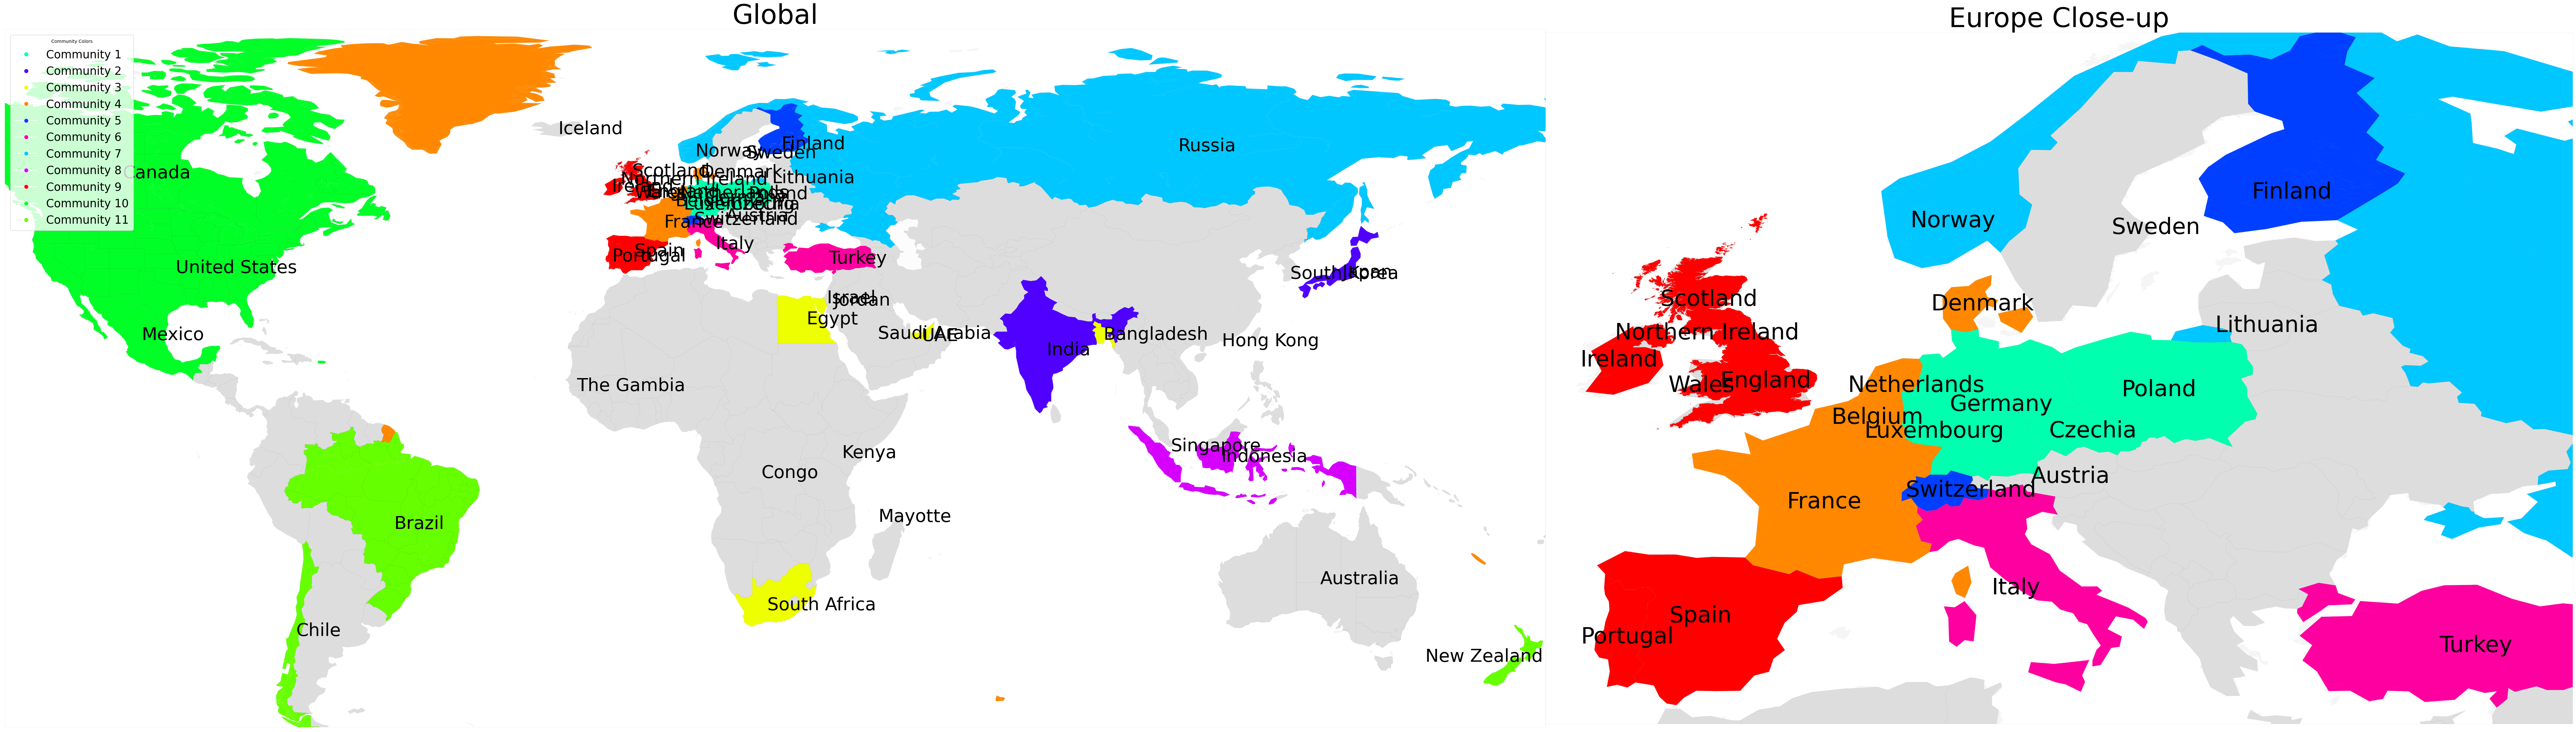

In [25]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import Patch
from matplotlib.lines import Line2D  # 
import numpy as np


ax1_annotate_size=40
ax2_annotate_size=50

suptitle_fontsize=80
ax1_fontsize=60
ax2_fontsize=60
map_linewidth=0.03


fig = plt.figure(num=None, figsize=(80, 30) ) 
spec = gridspec.GridSpec(ncols=2, nrows=1,width_ratios=[1.5, 1], wspace=0,hspace=0, height_ratios=[1])
 




ax1 = fig.add_subplot(spec[0], facecolor='w', frame_on=True )
ax1.set_title('Global',fontsize=ax1_fontsize)


# map 1: sovereignty level 

m = Basemap(llcrnrlon=-130, llcrnrlat=-55, urcrnrlon=179, urcrnrlat=85, resolution='l')
m.drawmapboundary(fill_color='white', linewidth=map_linewidth)
m.fillcontinents(color='#f2f2f2', alpha=0.7)
m.drawcoastlines(linewidth=map_linewidth, color="white")
m.readshapefile('data/ne_110m_admin_0_sovereignty/ne_110m_admin_0_sovereignty', name='units', linewidth=map_linewidth)



colored_region=[]
        


for info, shape in zip(m.units_info, m.units):
    name_en = info['SUBUNIT']
    if name_en not in regions_community_filtered_by_size:
        color = '#dddddd'
    #elif name_en in regions_filtered_out:
    #    color = '#6c757d'
    else:
        color = scheme[name_en]
        colored_region.append(name_en)

    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax1.add_collection(pc)
    

# map 2: states_provinces level

m.drawmapboundary(fill_color='white', linewidth=map_linewidth)
#m.fillcontinents(color='#f2f2f2', alpha=0.7)
m.drawcoastlines(linewidth=map_linewidth, color="white")
m.readshapefile('data/ne_50m_admin_1_states_provinces/ne_50m_admin_1_states_provinces', name='units', linewidth=map_linewidth)
 


uncolored=list(set(regions_community_filtered_by_size)-set(colored_region))      

for info, shape in zip(m.units_info, m.units):
    name_en = info['name_en']
    if name_en in uncolored:
        color = scheme[name_en]
        patches = [Polygon(np.array(shape), True)]
        pc = PatchCollection(patches)
        pc.set_facecolor(color)
        ax1.add_collection(pc)








# map 3: UK country level




m.drawmapboundary(fill_color='white', linewidth=map_linewidth)
m.readshapefile('data/GBR_adm/GBR_adm1', name='units', linewidth=map_linewidth)

for info, shape in zip(m.units_info, m.units):
    name_en = info['NAME_1']
    if name_en in list(set(uncolored) & set(['Wales','Scotland','England','Northern Ireland'])):
        color = scheme[name_en]
        patches = [Polygon(np.array(shape), True)]
        pc = PatchCollection(patches)
        pc.set_facecolor(color)
        ax1.add_collection(pc)

    

for i in formatted_regions:
    if i=='New Zealand':
        ax1.annotate(i, xy=m(region_geo[i][0]-20, region_geo[i][1]), size=ax1_annotate_size, verticalalignment='center')
    elif i=='United Arab Emirates':
        ax1.annotate('UAE', xy=m(region_geo[i][0], region_geo[i][1]), size=ax1_annotate_size, verticalalignment='center')
    elif i=='Democratic Republic of the Congo':
        ax1.annotate('Congo', xy=m(region_geo[i][0], region_geo[i][1]), size=ax1_annotate_size, verticalalignment='center')

    else:
        ax1.annotate(i, xy=m(region_geo[i][0], region_geo[i][1]), size=ax1_annotate_size, verticalalignment='center')



#for i in uncolored_final:
#    ax1.plot(m(region_geo[i][0],region_geo[i][1])[0],m(region_geo[i][0],region_geo[i][1])[1], color = scheme[i], marker="o", markersize=20)


# Create a scheme mapping communities to colors
community_color_mapping = {community: color for community, color in enumerate(list(set(color_list)), start=1)}

# Create a simplified legend for the color scheme
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f"Community {community}",
                              markerfacecolor=color, markersize=10)
                   for community, color in community_color_mapping.items()]
ax1.legend(handles=legend_elements, title="Community Colors", loc='upper left', fontsize=25)
    

#---------------------------------------------------------------------------------------------------------------------------------------------------------

ax2 = fig.add_subplot(122, facecolor='w', frame_on=True)

ax2.set_title('Europe Close-up',fontsize=ax2_fontsize) 




#description = 'Europe'


# Start a new plot: soverighty level europe zoom-in



m2=Basemap(llcrnrlon=-12, llcrnrlat=35, urcrnrlon=40, urcrnrlat=70, resolution='l')
#m2=Basemap(llcrnrlon=-50, llcrnrlat=-60, urcrnrlon=179, urcrnrlat=90, resolution='l')
m2.drawmapboundary(fill_color='white', linewidth=map_linewidth)
m2.fillcontinents(color='#f2f2f2', alpha=0.7)
m2.drawcoastlines(linewidth=map_linewidth, color="white")
m2.readshapefile('data/ne_110m_admin_0_sovereignty/ne_110m_admin_0_sovereignty', name='units', linewidth=map_linewidth)





for info, shape in zip(m2.units_info, m2.units):
    name_en = info['SUBUNIT']
    if name_en not in regions_community_filtered_by_size:
        color = '#dddddd'
    else:
        color = scheme[name_en]


    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax2.add_collection(pc)

    
# map 3: UK country level



m2.drawmapboundary(fill_color='white', linewidth=map_linewidth)
m2.readshapefile('data/GBR_adm/GBR_adm1', name='units', linewidth=map_linewidth)

for info, shape in zip(m2.units_info, m2.units):
    name_en = info['NAME_1']
    if name_en in list(set(uncolored) & set(['Wales','Scotland','England','Northern Ireland'])):
        color = scheme[name_en]
        patches = [Polygon(np.array(shape), True)]
        pc = PatchCollection(patches)
        pc.set_facecolor(color)
        ax2.add_collection(pc)

#for i in uncolored_final:
#    ax2.plot(m2(region_geo[i][0],region_geo[i][1])[0],m2(region_geo[i][0],region_geo[i][1])[1], color = scheme[i], marker="o", markersize=30)


for i in formatted_regions:
    plt.annotate(i, xy=m2(region_geo[i][0]-2, region_geo[i][1]), size=ax2_annotate_size,verticalalignment='center')




state = np.random.RandomState(51423)


    
    
m4 = ax1.pcolormesh(state.rand(0, 0),cmap=cmap)


#fig.suptitle(fig_title,x=0.51,y=0.1,fontsize=suptitle_fontsize)
plt.tight_layout() 

#plt.savefig(path, format='pdf')

plt.savefig(path.replace('pdf','png'),dpi=300)

plt.show


print('uncolored',uncolored)

# network visualisation

In [43]:


if classifier=='CNN':

    # MCC CNN

    if softmax==True:
        path=f'figures/MCC_CNN/network_MCC_CNN_soft_{threshold}_{sample_size}_{start_month}---{end_month}_{accuracy:.4f}.pdf'

    if softmax==False:
        path=f'figures/MCC_CNN/network_MCC_CNN_{threshold}_{sample_size}_{start_month}---{end_month}_{accuracy:.4f}.pdf'



# MCC NB
if classifier=='NB':
    path=f'figures/MCC_NB/network_MCC_NB_{threshold}_{sample_size}_kmer{kmer}_{start_month}---{end_month}.pdf'
print(path)


figures/MCC_NB/network_MCC_NB_300_300_kmer25_2020-07---2021-05.pdf


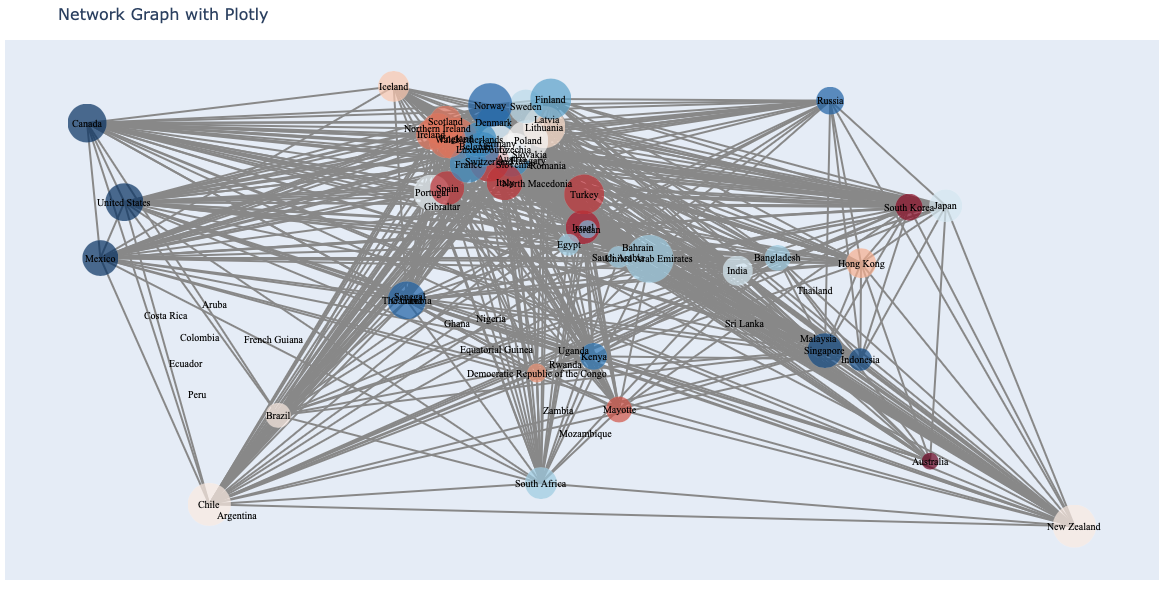

In [54]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="Your_Name")
region_list=list(set(G_NN.nodes()))

partition = community_louvain.best_partition(G_NN, weight='weight', resolution=resolution)

pos =dict(region_geo)

node_size=[i for i in list(dict(G_NN.degree()).values())]



import plotly.graph_objects as go

edge_x = []
edge_y = []
for edge in G_NN.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

    
    
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
        line=dict(
        color='#888'
    ),
    hoverinfo='none',
    mode='lines')





node_x = []
node_y = []
node_text = []
node_color = []
for node in G_NN.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)
    community_id = partition.get(node, 0) 
    node_color.append(community_id)
    
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    text=node_text,
    marker=dict(
        showscale=False,
        colorscale='RdBu',
        color=node_color,
        size=node_size,
        colorbar=dict(
            thickness=15,
            title='Community',
            xanchor='left',
            titleside='right'
        ),
        line_width=0.1))

annotations = []
for node, (x, y) in pos.items():
    annotations.append(dict(x=x, y=y, xref='x', yref='y',
                            text=node, showarrow=False,
                            font=dict(size=10)))

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Network Graph with Plotly',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    annotations=annotations,
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

fig.update_layout(
    width=1000,  
    height=600,  
)

fig.update_annotations(font=dict(family="Times New Roman", size=10, color="black"))
fig.show()
fig.write_image(path)



# Compare with a configuration preserving weight sequences

In [28]:
#shuffle node degree
#preserving degree sequence
deg_seq=[d for n, d in G_NN.degree()]
for i in range(500):
    random.shuffle(deg_seq)
seed=1
G_config=nx.configuration_model(deg_seq, seed=seed)

weights = [G_NN[u][v]['weight'] for u,v in G_NN.edges() ]
for i in range(100):
    random.shuffle(weights)
mapping=dict(zip(list(range(len(formatted_regions))),formatted_regions))

G_config = nx.relabel_nodes(G_config, mapping)

for (source,target) in G_config.edges():
    G_config[source][target][0]['weight']=weights[i]

print(len(G_config.edges())==len(G_NN.edges()))

True


In [29]:
permuted_partition = community_louvain.best_partition(G_config, weight='weight', resolution=resolution)


permuted_community_dict_formatted=dict(zip(formatted_regions,list(permuted_partition.values())))

community_grouped = defaultdict(list)
for key, val in sorted(permuted_community_dict_formatted.items()):
    community_grouped[val].append(key)

n_communities=len(set(permuted_community_dict_formatted.values()))
communities_sorted_bysize=dict(enumerate(sorted(list(community_grouped.values()), key=len,reverse=True)))

communities_size_geq_2=[k for (k,v) in list(communities_sorted_bysize.items()) if len(v)>1]

regions_community_size_geq_2=[v for (k,v) in list(communities_sorted_bysize.items()) if len(v)>1]
regions_community_size_geq_2=sum(regions_community_size_geq_2,[])

geq2_community_dict_formatted={region_i:community_id for (community_id,members_c) in list(communities_sorted_bysize.items()) for region_i in members_c if len(members_c)>1}
geq2_community_dict_formatted

{'Austria': 0,
 'Denmark': 0,
 'Egypt': 0,
 'England': 0,
 'Germany': 0,
 'Indonesia': 0,
 'Italy': 0,
 'Japan': 0,
 'Northern Ireland': 0,
 'Portugal': 0,
 'Saudi Arabia': 0,
 'Sweden': 0,
 'Australia': 1,
 'Brazil': 1,
 'Chile': 1,
 'Democratic Republic of the Congo': 1,
 'Finland': 1,
 'Ireland': 1,
 'Jordan': 1,
 'Luxembourg': 1,
 'Switzerland': 1,
 'United States': 1,
 'Wales': 1,
 'Bangladesh': 2,
 'Canada': 2,
 'Kenya': 2,
 'Mexico': 2,
 'New Zealand': 2,
 'Singapore': 2,
 'South Africa': 2,
 'Spain': 2,
 'United Arab Emirates': 2,
 'Belgium': 3,
 'Hong Kong': 3,
 'Iceland': 3,
 'Israel': 3,
 'Lithuania': 3,
 'Mayotte': 3,
 'Norway': 3,
 'Russia': 3,
 'South Korea': 3,
 'Czechia': 4,
 'France': 4,
 'India': 4,
 'Netherlands': 4,
 'Poland': 4,
 'Scotland': 4,
 'The Gambia': 4,
 'Turkey': 4}

In [30]:
cmap = cm.get_cmap('hsv')

n_partitionn=len(set(geq2_community_dict_formatted.values()))

num_colors=n_partitionn
color_list=[cmap(community / num_colors) for community in list(geq2_community_dict_formatted.values())]
scheme=dict(zip(list(geq2_community_dict_formatted.keys()),color_list))


In [31]:
if classifier=='CNN':

    # MCC CNN

    if softmax==True:
        path=f'figures/MCC_CNN/Configuration_Permuted_MCC_CNN_soft_{threshold}_{sample_size}_{start_month}---{end_month}_{accuracy:.4f}.pdf'
        fig_title=f'MCC CNN Soft Configuration Misclassification Network, threshold={threshold}, sample_size={sample_size}'

    if softmax==False:
        path=f'figures/MCC_CNN/Configuration_Permuted_MCC_CNN_{threshold}_{sample_size}_{start_month}---{end_month}_{accuracy:.4f}.pdf'

        fig_title=f'MCC CNN Configuration Misclassification Network, threshold={threshold}, sample_size={sample_size}'


# MCC NB
if classifier=='NB':
    path=f'figures/MCC_NB/Configuration_Permuted_MCC_NB_cv5fold_{threshold}_{sample_size}_kmer{kmer}_{start_month}---{end_month}.pdf'
    fig_title=f'MCC NB Configuration Misclassification Network, threshold={threshold}, sample_size={sample_size}'
print(path)
print(fig_title)


figures/MCC_NB/Configuration_Permuted_MCC_NB_cv5fold_300_300_kmer25_2020-07---2021-05.pdf
MCC NB Configuration Misclassification Network, threshold=300, sample_size=300


/tmp/ipykernel_30120/2878985136.py:44: MatplotlibDeprecationWarning:

Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.

/tmp/ipykernel_30120/2878985136.py:89: MatplotlibDeprecationWarning:

Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.

/tmp/ipykernel_30120/2878985136.py:155: MatplotlibDeprecationWarning:

Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.

/tmp/ipykernel_30120/2878985136.py:173: MatplotlibDeprecationWarning:

Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.



uncolored ['The Gambia', 'Singapore', 'Scotland', 'Northern Ireland', 'England', 'Wales']


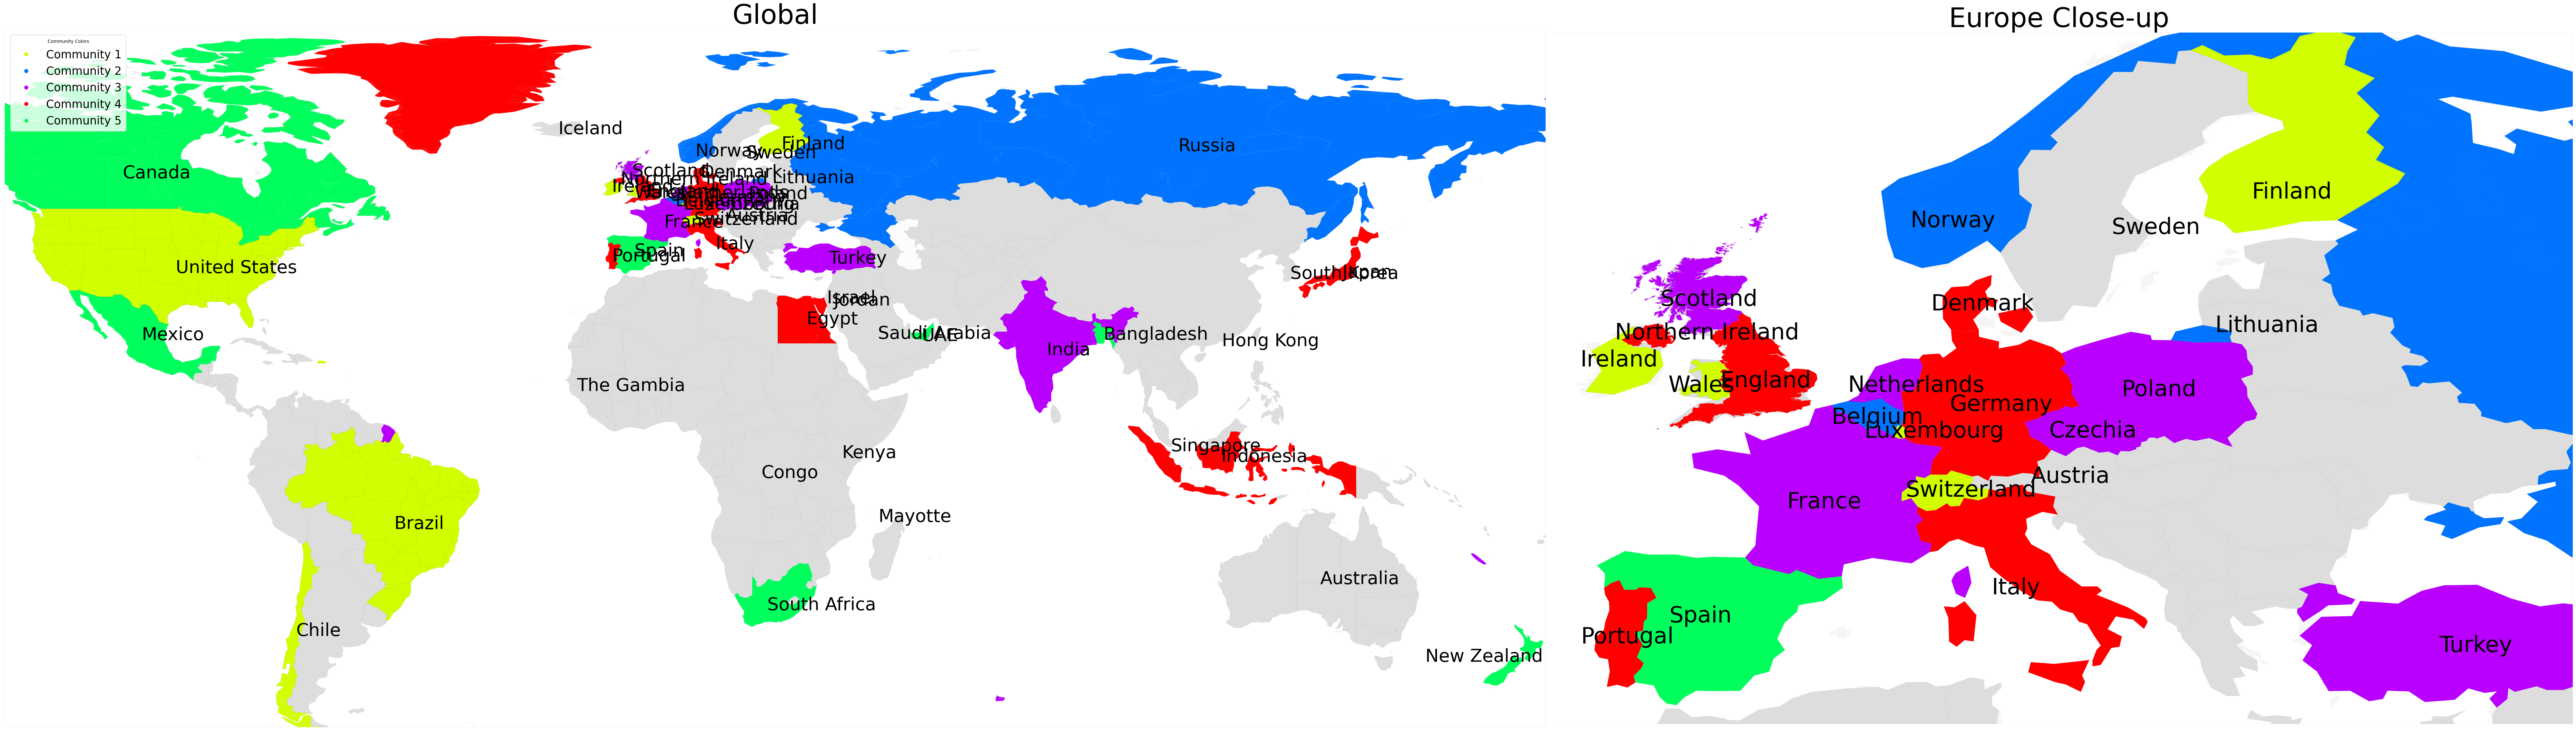

In [33]:

ax1_annotate_size=40
ax2_annotate_size=50

suptitle_fontsize=80
ax1_fontsize=60
ax2_fontsize=60
map_linewidth=0.03


fig = plt.figure(num=None, figsize=(80, 30) ) 
spec = gridspec.GridSpec(ncols=2, nrows=1,width_ratios=[1.5, 1], wspace=0,hspace=0, height_ratios=[1])
 



ax1 = fig.add_subplot(spec[0], facecolor='w', frame_on=True )
ax1.set_title('Global',fontsize=ax1_fontsize)


# map 1: sovereignty level 

m = Basemap(llcrnrlon=-130, llcrnrlat=-55, urcrnrlon=179, urcrnrlat=85, resolution='l')
m.drawmapboundary(fill_color='white', linewidth=map_linewidth)
m.fillcontinents(color='#f2f2f2', alpha=0.7)
m.drawcoastlines(linewidth=map_linewidth, color="white")
m.readshapefile('data/ne_110m_admin_0_sovereignty/ne_110m_admin_0_sovereignty', name='units', linewidth=map_linewidth)



colored_region=[]
        


for info, shape in zip(m.units_info, m.units):
    name_en = info['SUBUNIT']
    if name_en not in regions_community_filtered_by_size:
        color = '#dddddd'
    #elif name_en in regions_filtered_out:
    #    color = '#6c757d'
    else:
        color = scheme[name_en]
        colored_region.append(name_en)

    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax1.add_collection(pc)
    

# map 2: states_provinces level

m.drawmapboundary(fill_color='white', linewidth=map_linewidth)
#m.fillcontinents(color='#f2f2f2', alpha=0.7)
m.drawcoastlines(linewidth=map_linewidth, color="white")
m.readshapefile('data/ne_50m_admin_1_states_provinces/ne_50m_admin_1_states_provinces', name='units', linewidth=map_linewidth)
 


uncolored=list(set(regions_community_filtered_by_size)-set(colored_region))      

for info, shape in zip(m.units_info, m.units):
    name_en = info['name_en']
    if name_en in uncolored:
        color = scheme[name_en]
        patches = [Polygon(np.array(shape), True)]
        pc = PatchCollection(patches)
        pc.set_facecolor(color)
        ax1.add_collection(pc)








# map 3: UK country level




m.drawmapboundary(fill_color='white', linewidth=map_linewidth)
m.readshapefile('data/GBR_adm/GBR_adm1', name='units', linewidth=map_linewidth)

for info, shape in zip(m.units_info, m.units):
    name_en = info['NAME_1']
    if name_en in list(set(uncolored) & set(['Wales','Scotland','England','Northern Ireland'])):
        color = scheme[name_en]
        patches = [Polygon(np.array(shape), True)]
        pc = PatchCollection(patches)
        pc.set_facecolor(color)
        ax1.add_collection(pc)

for i in formatted_regions:
    if i=='New Zealand':
        ax1.annotate(i, xy=m(region_geo[i][0]-20, region_geo[i][1]), size=ax1_annotate_size, verticalalignment='center')
    elif i=='United Arab Emirates':
        ax1.annotate('UAE', xy=m(region_geo[i][0], region_geo[i][1]), size=ax1_annotate_size, verticalalignment='center')
    elif i=='Democratic Republic of the Congo':
        ax1.annotate('Congo', xy=m(region_geo[i][0], region_geo[i][1]), size=ax1_annotate_size, verticalalignment='center')

    else:
        ax1.annotate(i, xy=m(region_geo[i][0], region_geo[i][1]), size=ax1_annotate_size, verticalalignment='center')
    

#for i in uncolored_final:
#    ax1.plot(m(region_geo[i][0],region_geo[i][1])[0],m(region_geo[i][0],region_geo[i][1])[1], color = scheme[i], marker="o", markersize=20)


# Create a scheme mapping communities to colors
community_color_mapping = {community: color for community, color in enumerate(list(set(color_list)), start=1)}

# Create a simplified legend for the color scheme
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f"Community {community}",
                              markerfacecolor=color, markersize=10)
                   for community, color in community_color_mapping.items()]
ax1.legend(handles=legend_elements, title="Community Colors", loc='upper left', fontsize=25)
    

#---------------------------------------------------------------------------------------------------------------------------------------------------------

ax2 = fig.add_subplot(122, facecolor='w', frame_on=True)

ax2.set_title('Europe Close-up',fontsize=ax2_fontsize) 




description = 'Europe'


# Start a new plot: soverighty level europe zoom-in



m2=Basemap(llcrnrlon=-12, llcrnrlat=35, urcrnrlon=40, urcrnrlat=70, resolution='l')
#m2=Basemap(llcrnrlon=-50, llcrnrlat=-60, urcrnrlon=179, urcrnrlat=90, resolution='l')
m2.drawmapboundary(fill_color='white', linewidth=map_linewidth)
m2.fillcontinents(color='#f2f2f2', alpha=0.7)
m2.drawcoastlines(linewidth=map_linewidth, color="white")
m2.readshapefile('data/ne_110m_admin_0_sovereignty/ne_110m_admin_0_sovereignty', name='units', linewidth=map_linewidth)





for info, shape in zip(m2.units_info, m2.units):
    name_en = info['SUBUNIT']
    if name_en not in regions_community_filtered_by_size:
        color = '#dddddd'
    else:
        color = scheme[name_en]


    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax2.add_collection(pc)

    
# map 3: UK country level

m2=Basemap(llcrnrlon=-12, llcrnrlat=35, urcrnrlon=40, urcrnrlat=70, resolution='l')

#m2=Basemap(llcrnrlon=-50, llcrnrlat=-60, urcrnrlon=179, urcrnrlat=90, resolution='l')
m2.drawmapboundary(fill_color='white', linewidth=map_linewidth)
m2.readshapefile('data/GBR_adm/GBR_adm1', name='units', linewidth=map_linewidth)

for info, shape in zip(m2.units_info, m2.units):
    name_en = info['NAME_1']
    if name_en in list(set(uncolored) & set(['Wales','Scotland','England','Northern Ireland'])):
        color = scheme[name_en]
        patches = [Polygon(np.array(shape), True)]
        pc = PatchCollection(patches)
        pc.set_facecolor(color)
        ax2.add_collection(pc)

#for i in uncolored_final:
#    ax2.plot(m2(region_geo[i][0],region_geo[i][1])[0],m2(region_geo[i][0],region_geo[i][1])[1], color = scheme[i], marker="o", markersize=30)


for i in formatted_regions:
    plt.annotate(i, xy=m2(region_geo[i][0]-2, region_geo[i][1]), size=ax2_annotate_size,verticalalignment='center')




state = np.random.RandomState(51423)


    
    
m4 = ax1.pcolormesh(state.rand(0, 0),cmap=cmap)


#fig.suptitle(fig_title,x=0.51,y=0.1,fontsize=suptitle_fontsize)
plt.tight_layout() 

#plt.savefig(path, format='pdf')

plt.savefig(path.replace('pdf','png'),dpi=300)

plt.show


print('uncolored',uncolored)